   ## ICC Mens T20 2024  Cricket World Cup Analysis

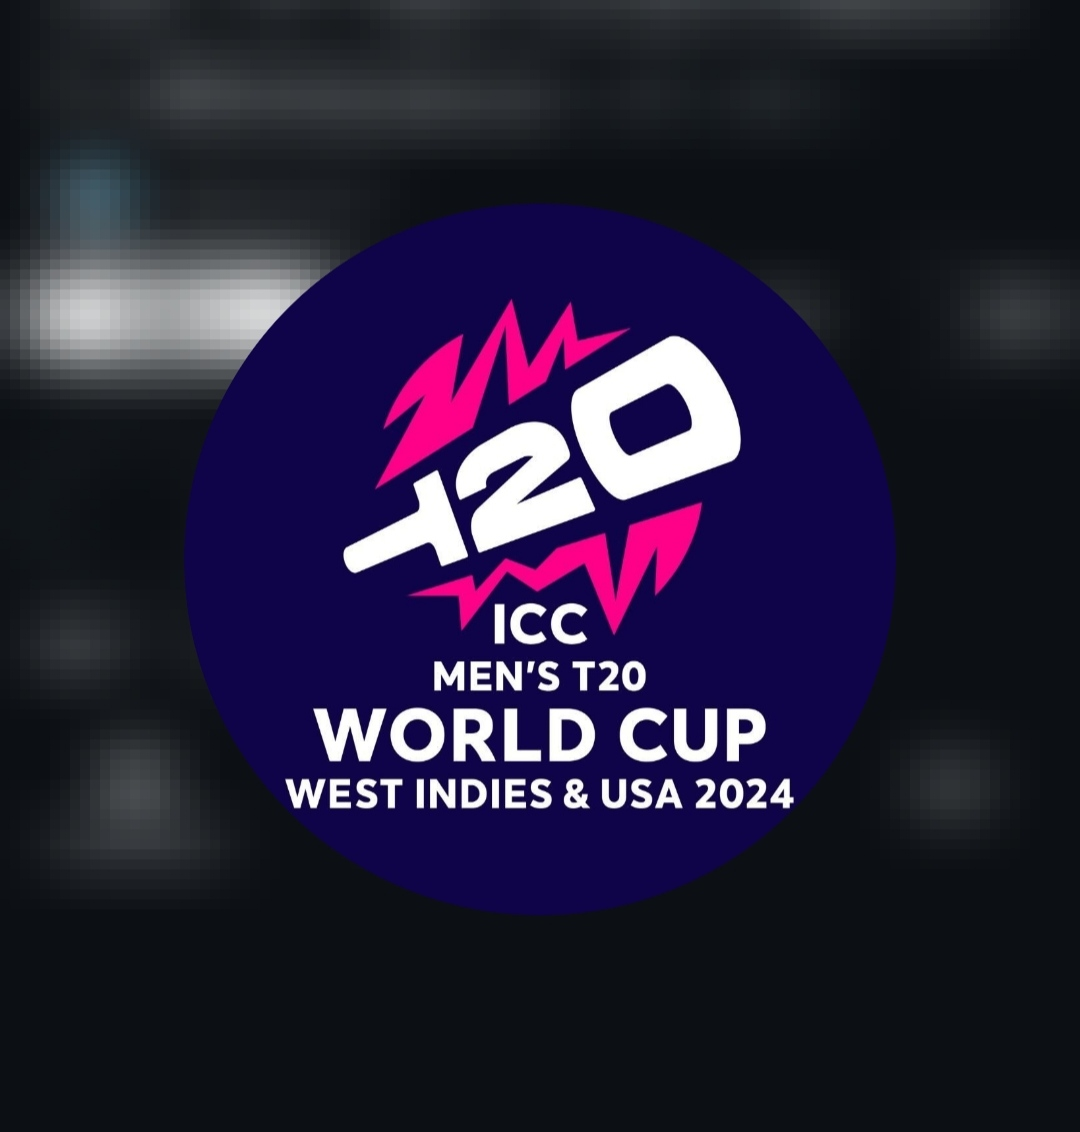

In [1]:
from IPython.display import Image, display

# Path to the uploaded image
image_path = r"C:\Users\arunb\Downloads\download.jpeg"

# Display the image
display(Image(filename=image_path))

## About Dataset


## The 2024 ICC Men's T20 World Cup was the ninth edition of the ICC Men's T20 World Cup. It was co-hosted by the West Indies and the United States from 1 to 29 June 2024; the tournament was hosted by the West Indies for the second time, while this was also the first major ICC tournament to feature matches played in the United States.

The tournament field expanded from 16 to 20 teams, including the two hosts, the top eight teams from the 2022 edition, the best-placed two teams in the ICC Men's T20I Team Rankings not already qualified, and eight other teams determined by regional qualifiers. Canada and Uganda qualified for the men's T20 World Cup for the first time, while the United States participated for the first time by being co-hosts.

England were the defending champions and were beaten by India in the semi-finals, who went on to win their second T20 World Cup title, defeating South Africa by 7 runs and equalling England and West Indies with the most titles in T20 World Cup.

Reference: https://en.wikipedia.org/wiki/2024_ICC_Men%27s_T20_World_Cup

### Importing the Libraries

In [2]:
from sklearn import datasets
import math
import warnings
warnings.filterwarnings("ignore")
import os
os.getcwd()
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Convolution2D, MaxPool2D, BatchNormalization
from tensorflow.keras.models import Sequential
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import keras
import cv2
import seaborn as sns 
from sklearn.metrics import confusion_matrix

from keras.preprocessing import image

In [3]:
import cv2
print(cv2.__version__)  # This should print the version of OpenCV installed

4.10.0


In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


### Importing the Dataset

In [5]:
df=pd.read_csv(r"C:\Users\arunb\Downloads\Compressed\wct20 2024 dataset\deliveries.csv")
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.1,Papua New Guinea,West Indies,TP Ura,A Vala,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.2,Papua New Guinea,West Indies,TP Ura,A Vala,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.3,Papua New Guinea,West Indies,A Vala,TP Ura,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.4,Papua New Guinea,West Indies,A Vala,TP Ura,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.5,Papua New Guinea,West Indies,A Vala,TP Ura,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df1=pd.read_csv(r"C:\Users\arunb\Downloads\Compressed\wct20 2024 dataset\matches.csv")
df1.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2024,Canada,United States of America,2024/06/01,1,Grand Prairie Stadium,Dallas,United States of America,field,Aaron Jones,RK Illingworth,Sharfuddoula,L Rusere,RB Richardson,United States of America,NaN,7.0,Group
1,2024,Papua New Guinea,West Indies,2024/06/02,2,Providence Stadium,Providence,West Indies,field,RL Chase,AT Holdstock,Rashid Riaz,HDPK Dharmasena,AJ Pycroft,West Indies,NaN,5.0,Group
2,2024,Oman,Namibia,2024/06/02,3,Kensington Oval,Bridgetown,Namibia,field,D Wiese,J Madanagopal,JS Wilson,Asif Yaqoob,RS Madugalle,NaN,NaN,NaN,Group
3,2024,Sri Lanka,South Africa,2024/06/03,4,Nassau County International Cricket Stadium,New York,Sri Lanka,bat,A Nortje,CM Brown,RA Kettleborough,AG Wharf,JJ Crowe,South Africa,NaN,6.0,Group
4,2024,Afghanistan,Uganda,2024/06/03,5,Providence Stadium,Providence,Uganda,field,Fazalhaq Farooqi,Ahsan Raza,HDPK Dharmasena,Rashid Riaz,AJ Pycroft,Afghanistan,125.0,NaN,Group


### Basic Understand of Data

In [7]:
df.shape

(11472, 22)

In [8]:
df1.shape

(52, 18)

In [9]:
df.info

<bound method DataFrame.info of        match_id  season  start_date                                  venue  \
0             1    2024  2024-06-02             Providence Stadium, Guyana   
1             1    2024  2024-06-02             Providence Stadium, Guyana   
2             1    2024  2024-06-02             Providence Stadium, Guyana   
3             1    2024  2024-06-02             Providence Stadium, Guyana   
4             1    2024  2024-06-02             Providence Stadium, Guyana   
...         ...     ...         ...                                    ...   
11467        54    2024  2024-06-29  Kensington Oval, Bridgetown, Barbados   
11468        54    2024  2024-06-29  Kensington Oval, Bridgetown, Barbados   
11469        54    2024  2024-06-29  Kensington Oval, Bridgetown, Barbados   
11470        54    2024  2024-06-29  Kensington Oval, Bridgetown, Barbados   
11471        54    2024  2024-06-29  Kensington Oval, Bridgetown, Barbados   

       innings  ball      batti

In [10]:
df1.info

<bound method DataFrame.info of     season                     team1                     team2        date  \
0     2024                    Canada  United States of America  2024/06/01   
1     2024          Papua New Guinea               West Indies  2024/06/02   
2     2024                      Oman                   Namibia  2024/06/02   
3     2024                 Sri Lanka              South Africa  2024/06/03   
4     2024               Afghanistan                    Uganda  2024/06/03   
5     2024                  Scotland                   England  2024/06/04   
6     2024                     Nepal               Netherlands  2024/06/04   
7     2024                   Ireland                     India  2024/06/05   
8     2024          Papua New Guinea                    Uganda  2024/06/05   
9     2024                 Australia                      Oman  2024/06/05   
10    2024                  Pakistan  United States of America  2024/06/06   
11    2024                   Nam

In [11]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [12]:
df1.columns

Index(['season', 'team1', 'team2', 'date', 'match_number', 'venue', 'city',
       'toss_winner', 'toss_decision', 'player_of_match', 'umpire1', 'umpire2',
       'reserve_umpire', 'match_referee', 'winner', 'winner_runs',
       'winner_wickets', 'match_type'],
      dtype='object')

### Statistical summary

In [13]:
df.describe()

,match_id,season,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,other_wicket_type,other_player_dismissed
count,11472.000000,11472.0,11472.000000,11472.000000,11472.000000,11472.000000,408.000000,45.0,41.000000,179.000000,1.0,0.0,0.0
mean,26.879794,2024.0,1.465394,9.108439,1.062413,0.076360,1.245098,1.0,2.073171,1.301676,5.0,NaN,NaN
std,16.343629,0.0,0.508687,5.612894,1.566343,0.375929,0.857816,0.0,1.311302,0.866705,NaN,NaN,NaN
min,0.000000,2024.0,1.000000,0.100000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0,NaN,NaN
25%,12.000000,2024.0,1.000000,4.300000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0,NaN,NaN
50%,26.000000,2024.0,1.000000,8.700000,1.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0,NaN,NaN
75%,42.000000,2024.0,2.000000,13.600000,1.000000,0.000000,1.000000,1.0,4.000000,1.000000,5.0,NaN,NaN
max,54.000000,2024.0,4.000000,19.800000,6.000000,5.000000,5.000000,1.0,4.000000,5.000000,5.0,NaN,NaN


In [14]:
df1.describe()

,season,match_number,winner_runs,winner_wickets
count,52.0,52.000000,25.000000,24.000000
mean,2024.0,27.961538,40.240000,6.416667
std,0.0,16.453096,38.411457,2.244155
min,2024.0,1.000000,1.000000,2.000000
25%,2024.0,13.750000,12.000000,5.000000
50%,2024.0,27.500000,25.000000,7.000000
75%,2024.0,42.250000,50.000000,8.000000
max,2024.0,55.000000,134.000000,10.000000


### Data Cleaning And PreProcessing

In [15]:
df.shape

(11472, 22)

In [16]:
df1.shape

(52, 18)

In [17]:
df.isnull().sum()

match_id                      0
season                        0
start_date                    0
venue                         0
innings                       0
ball                          0
batting_team                  0
bowling_team                  0
striker                       0
non_striker                   0
bowler                        0
runs_off_bat                  0
extras                        0
wides                     11064
noballs                   11427
byes                      11431
legbyes                   11293
penalty                   11471
wicket_type               10788
player_dismissed          10788
other_wicket_type         11472
other_player_dismissed    11472
dtype: int64

In the Delivires data set there are hugh amount of null values are there

In [18]:
df1.isnull().sum()

season              0
team1               0
team2               0
date                0
match_number        0
venue               0
city                0
toss_winner         0
toss_decision       0
player_of_match     1
umpire1             0
umpire2             0
reserve_umpire      0
match_referee       0
winner              2
winner_runs        27
winner_wickets     28
match_type          0
dtype: int64

In the Matches Dataset there are some null values 

In [19]:
print(df.isnull().sum())

# Drop Rows with Any NULL Values
df_cleaned = df.dropna()

# Fill NULL Values with Mean
mean_value = df['wides'].mean()
df['wides'].fillna(value=mean_value, inplace=True)

match_id                      0
season                        0
start_date                    0
venue                         0
innings                       0
ball                          0
batting_team                  0
bowling_team                  0
striker                       0
non_striker                   0
bowler                        0
runs_off_bat                  0
extras                        0
wides                     11064
noballs                   11427
byes                      11431
legbyes                   11293
penalty                   11471
wicket_type               10788
player_dismissed          10788
other_wicket_type         11472
other_player_dismissed    11472
dtype: int64


In [20]:
df['wides'].fillna(value=mean_value, inplace=True)
df['noballs'].fillna(value=mean_value, inplace=True)
df['byes'].fillna(value=mean_value, inplace=True)
df['legbyes'].fillna(value=mean_value, inplace=True)
df['penalty'].fillna(value=mean_value, inplace=True)
df['wicket_type'].fillna(value=mean_value, inplace=True)
df['player_dismissed'].fillna(value=mean_value, inplace=True)
df['other_wicket_type'].fillna(value=mean_value, inplace=True)
df['other_player_dismissed'].fillna(value=mean_value, inplace=True)

In [21]:
df.isnull().sum()

match_id                  0
season                    0
start_date                0
venue                     0
innings                   0
ball                      0
batting_team              0
bowling_team              0
striker                   0
non_striker               0
bowler                    0
runs_off_bat              0
extras                    0
wides                     0
noballs                   0
byes                      0
legbyes                   0
penalty                   0
wicket_type               0
player_dismissed          0
other_wicket_type         0
other_player_dismissed    0
dtype: int64

In [22]:
df1.isnull().sum()

season              0
team1               0
team2               0
date                0
match_number        0
venue               0
city                0
toss_winner         0
toss_decision       0
player_of_match     1
umpire1             0
umpire2             0
reserve_umpire      0
match_referee       0
winner              2
winner_runs        27
winner_wickets     28
match_type          0
dtype: int64

In [23]:
df1['player_of_match'].fillna(value=mean_value, inplace=True)
df1['winner'].fillna(value=mean_value, inplace=True)
df1['winner_runs'].fillna(value=mean_value, inplace=True)
df1['winner_wickets'].fillna(value=mean_value, inplace=True)

In [24]:
df1.isnull().sum()

season             0
team1              0
team2              0
date               0
match_number       0
venue              0
city               0
toss_winner        0
toss_decision      0
player_of_match    0
umpire1            0
umpire2            0
reserve_umpire     0
match_referee      0
winner             0
winner_runs        0
winner_wickets     0
match_type         0
dtype: int64

### Dropping Duplicates

In [25]:
df.duplicated().sum()

0

In [26]:
df1.duplicated().sum()

0

In [27]:
columns_list=df.columns
columns_list

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [28]:
for i in columns_list:
    print(i," : \n",df[i].unique())
    print("***\n")

match_id  : 
 [ 1  0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24
 25 26 27 28 30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54]
***

season  : 
 [2024]
***

start_date  : 
 ['2024-06-02' '2024-06-01' '2024-06-03' '2024-06-04' '2024-06-05'
 '2024-06-06' '2024-06-07' '2024-06-08' '2024-06-09' '2024-06-10'
 '2024-06-11' '2024-06-12' '2024-06-13' '2024-06-14' '2024-06-15'
 '2024-06-16' '2024-06-17' '2024-06-19' '2024-06-20' '2024-06-21'
 '2024-06-22' '2024-06-23' '2024-06-24' '2024-06-26' '2024-06-27'
 '2024-06-29']
***

venue  : 
 ['Providence Stadium, Guyana' 'Grand Prairie Stadium, Dallas'
 'Kensington Oval, Bridgetown, Barbados'
 'Nassau County International Cricket Stadium, New York'
 'Sir Vivian Richards Stadium, North Sound, Antigua'
 'Brian Lara Stadium, Tarouba, Trinidad'
 'Arnos Vale Ground, Kingstown, St Vincent'
 'Daren Sammy National Cricket Stadium, Gros Islet, St Lucia'
 'Central Broward Regional Park Stadium Turf Ground, Lauderh

In [29]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.1,Papua New Guinea,West Indies,TP Ura,A Vala,...,0,1.245098,1.245098,1.245098,1.245098,1.245098,1.245098,1.245098,1.245098,1.245098
1,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.2,Papua New Guinea,West Indies,TP Ura,A Vala,...,0,1.245098,1.245098,1.245098,1.245098,1.245098,1.245098,1.245098,1.245098,1.245098
2,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.3,Papua New Guinea,West Indies,A Vala,TP Ura,...,0,1.245098,1.245098,1.245098,1.245098,1.245098,1.245098,1.245098,1.245098,1.245098
3,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.4,Papua New Guinea,West Indies,A Vala,TP Ura,...,0,1.245098,1.245098,1.245098,1.245098,1.245098,1.245098,1.245098,1.245098,1.245098
4,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.5,Papua New Guinea,West Indies,A Vala,TP Ura,...,0,1.245098,1.245098,1.245098,1.245098,1.245098,1.245098,1.245098,1.245098,1.245098


In [30]:
df1.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2024,Canada,United States of America,2024/06/01,1,Grand Prairie Stadium,Dallas,United States of America,field,Aaron Jones,RK Illingworth,Sharfuddoula,L Rusere,RB Richardson,United States of America,1.245098,7.000000,Group
1,2024,Papua New Guinea,West Indies,2024/06/02,2,Providence Stadium,Providence,West Indies,field,RL Chase,AT Holdstock,Rashid Riaz,HDPK Dharmasena,AJ Pycroft,West Indies,1.245098,5.000000,Group
2,2024,Oman,Namibia,2024/06/02,3,Kensington Oval,Bridgetown,Namibia,field,D Wiese,J Madanagopal,JS Wilson,Asif Yaqoob,RS Madugalle,1.245098,1.245098,1.245098,Group
3,2024,Sri Lanka,South Africa,2024/06/03,4,Nassau County International Cricket Stadium,New York,Sri Lanka,bat,A Nortje,CM Brown,RA Kettleborough,AG Wharf,JJ Crowe,South Africa,1.245098,6.000000,Group
4,2024,Afghanistan,Uganda,2024/06/03,5,Providence Stadium,Providence,Uganda,field,Fazalhaq Farooqi,Ahsan Raza,HDPK Dharmasena,Rashid Riaz,AJ Pycroft,Afghanistan,125.000000,1.245098,Group


In [31]:
df['venue'].value_counts(ascending=False)

venue
Kensington Oval, Bridgetown, Barbados                            1941
Nassau County International Cricket Stadium, New York            1858
Sir Vivian Richards Stadium, North Sound, Antigua                1499
Daren Sammy National Cricket Stadium, Gros Islet, St Lucia       1446
Providence Stadium, Guyana                                       1338
Arnos Vale Ground, Kingstown, St Vincent                         1208
Grand Prairie Stadium, Dallas                                     992
Brian Lara Stadium, Tarouba, Trinidad                             951
Central Broward Regional Park Stadium Turf Ground, Lauderhill     239
Name: count, dtype: int64

In [32]:
df['wicket_type'].value_counts(ascending=False)

wicket_type
1.2450980392156863    10788
caught                  401
bowled                  131
lbw                      72
run out                  39
caught and bowled        23
stumped                  15
retired hurt              2
retired out               1
Name: count, dtype: int64

In [33]:
df['player_dismissed'].value_counts(ascending=False)

player_dismissed
1.2450980392156863    10788
Q de Kock                 9
RG Sharma                 8
Azmatullah Omarzai        8
Rahmanullah Gurbaz        8
                      ...  
R Shepherd                1
S Samarawickrama          1
JDS Neesham               1
TG Southee                1
JC Archer                 1
Name: count, Length: 228, dtype: int64

## Visualization

### Batting Record and Stats

### 1. Highest Run scorer in Season

In [34]:
top_run_scorer = df.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).reset_index()
top_run_scorer.head(10)

,striker,runs_off_bat
0,Rahmanullah Gurbaz,281
1,RG Sharma,257
2,TM Head,255
3,Q de Kock,243
4,Ibrahim Zadran,231
5,N Pooran,228
6,AGS Gous,219
7,JC Buttler,214
8,SA Yadav,199
9,H Klaasen,190


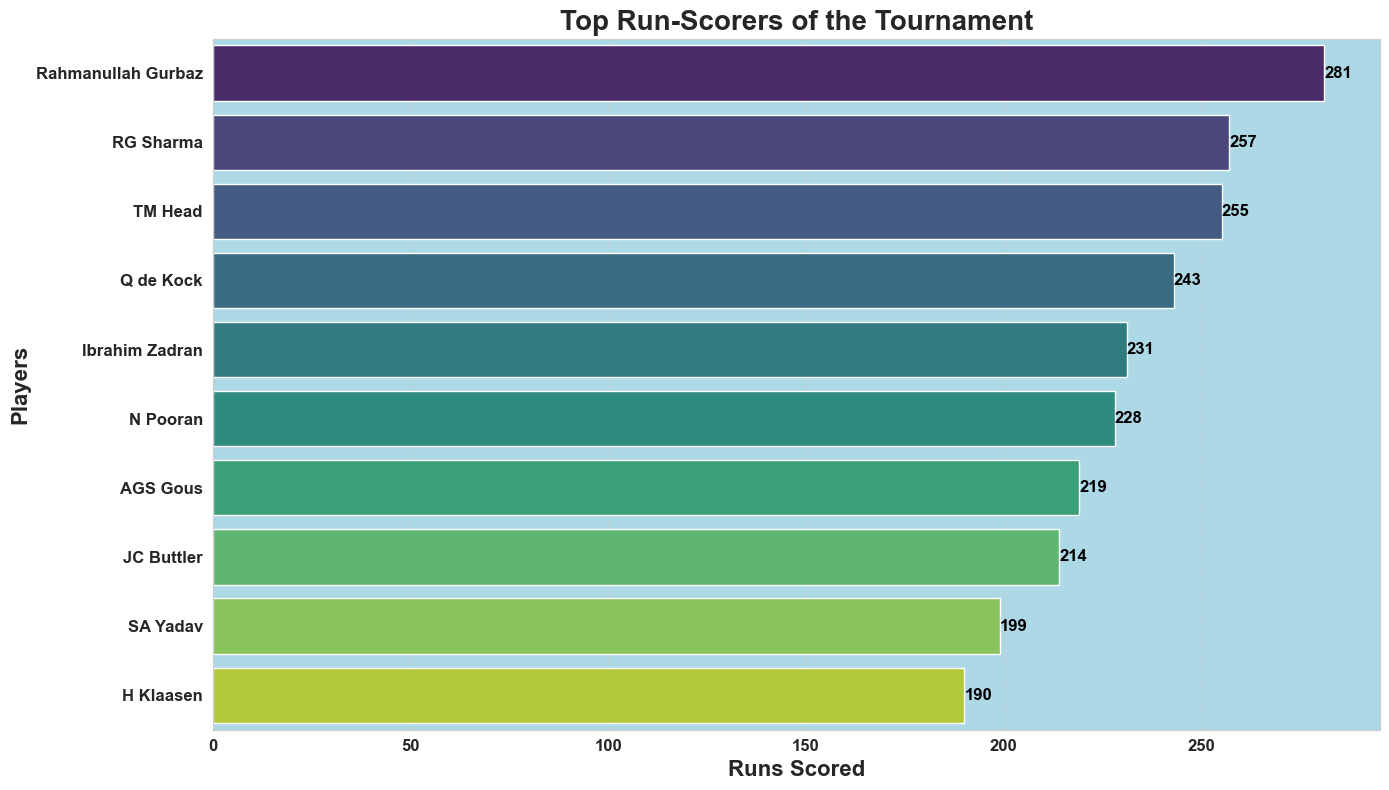

In [35]:
top_run_scorers = df.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.set_style(style="whitegrid")

barplot = sns.barplot(x=top_run_scorers.values, y=top_run_scorers.index, palette='viridis')
plt.title('Top Run-Scorers of the Tournament', fontsize=20, weight='bold')
plt.xlabel('Runs Scored', fontsize=16, weight='bold')
plt.ylabel('Players', fontsize=16, weight='bold')

for index, value in enumerate(top_run_scorers.values):
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

plt.tight_layout()
plt.show()

OBSERVATIONS

*Highest run scored by Player in T20WC 2024 is 281 by Rahmanullah Gurbaz.

*Rohit Sharma is on second spot with 257 runs.

*And Travis Head is on third spot with 255 runs.

### 2. Highest Individual Score by a player

In [36]:
highest_individual_score = df.groupby(['match_id', 'striker'])['runs_off_bat'].sum().sort_values(ascending=False)
highest_individual_score.head()
highest_individual_score = highest_individual_score.reset_index()
highest_individual_score.head(10)

,match_id,striker,runs_off_bat
0,39,N Pooran,98
1,0,Aaron Jones,94
2,50,RG Sharma,92
3,41,PD Salt,87
4,48,JC Buttler,83
5,45,SD Hope,82
6,40,AGS Gous,80
7,13,Rahmanullah Gurbaz,80
8,54,V Kohli,76
9,50,TM Head,76


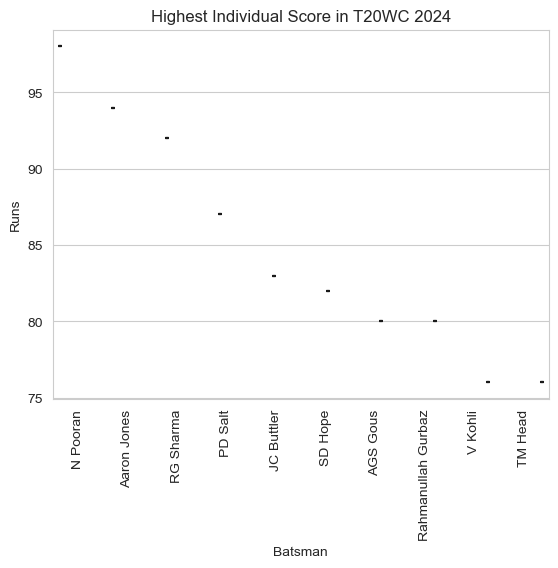

In [37]:
plt.title('Highest Individual Score in T20WC 2024')
plt.xticks(rotation= 90)
sns.boxplot(x = highest_individual_score['striker'].head(10), y = highest_individual_score['runs_off_bat'].head(10), hue=highest_individual_score['striker'].head(10) ,palette='dark:blue')
plt.ylabel('Runs')
plt.xlabel('Batsman')
plt.legend().remove()
plt.show()

Observations

*Highest Individual Runs came from the bat of Nicolas Pooran with 98 runs.

*Aaron James is on second spot with 94 runs in his Debut match.

*And Rohit Sharma is on third spot with 92 runs.

### 3. Most Sixes By Player in T20WC 2024

In [38]:
sixes_df = df[df['runs_off_bat'] == 6]
fours_df = df[df['runs_off_bat'] == 4]

In [39]:
most_sixes_by_striker = sixes_df.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).reset_index()
most_sixes_by_striker.head(10)

,striker,runs_off_bat
0,N Pooran,17
1,Rahmanullah Gurbaz,16
2,RG Sharma,15
3,TM Head,15
4,Aaron Jones,14
5,H Klaasen,13
6,Q de Kock,13
7,AGS Gous,11
8,JC Buttler,10
9,MP Stoinis,10


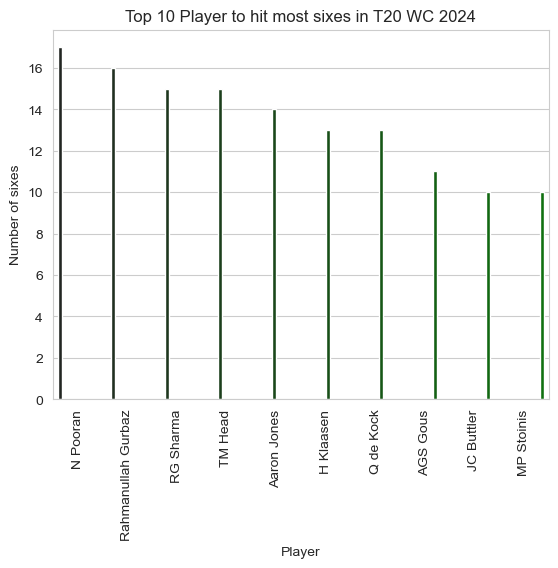

In [40]:
plt.title('Top 10 Player to hit most sixes in T20 WC 2024')
plt.xticks(rotation= 90)
sns.barplot(x = most_sixes_by_striker['striker'].head(10), y =  most_sixes_by_striker['runs_off_bat'].head(10), palette='dark:green', hue = most_sixes_by_striker['striker'].head(10))
plt.ylabel('Number of sixes')
plt.xlabel('Player')
plt.legend().remove()
plt.show()

OBSERVATIONS

*Nicolas Pooran holds the record of hitting 17 sixes in T20WC 2024.

*Rahmanullah Gurbaz is on second spot with 16 sixes.

*And Rohit Sharma is on third spot with 15 sixes.

### 4.Players with the Highest Strike Rates(Runs > 150)

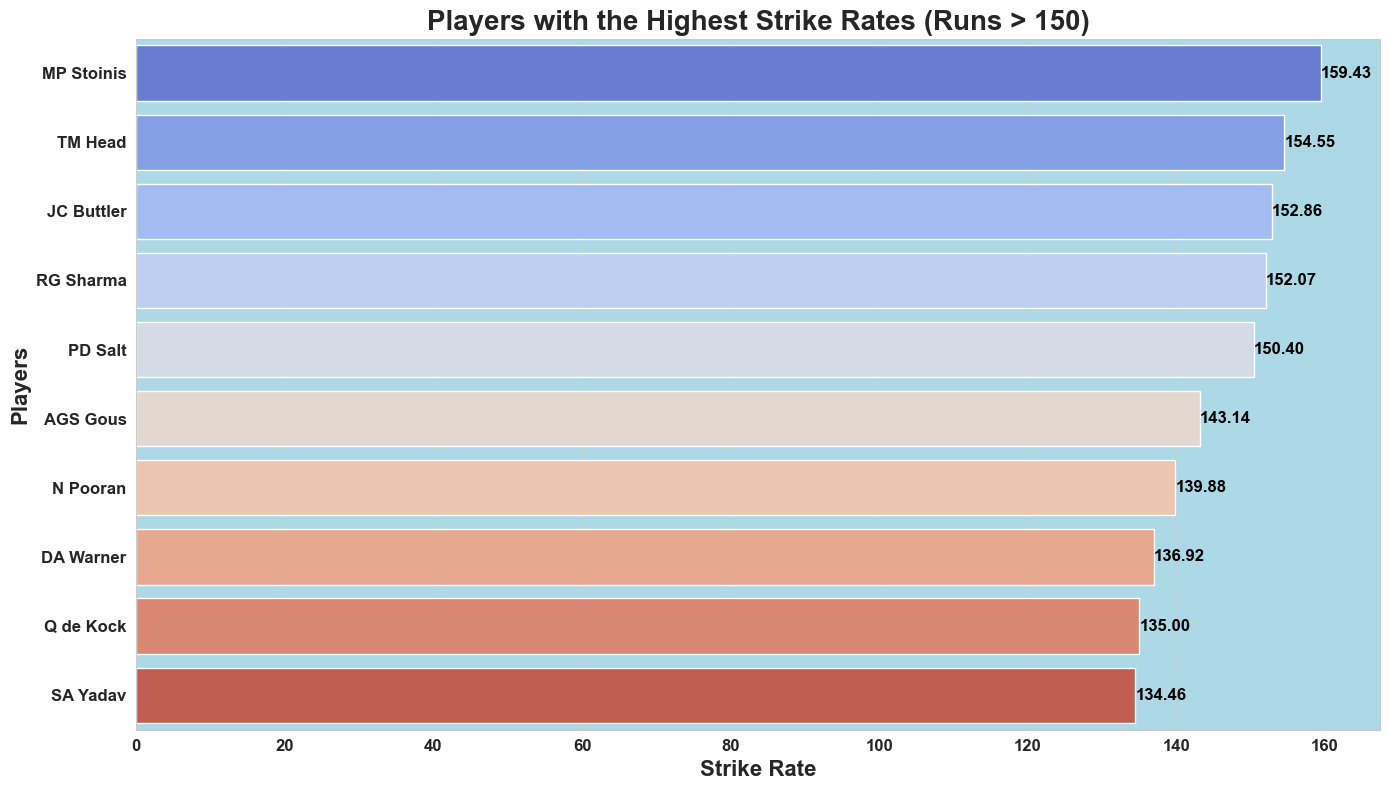

In [41]:
balls_faced = df.groupby('striker').size()
runs_scored = df.groupby('striker')['runs_off_bat'].sum()

strike_rate = (runs_scored / balls_faced) * 100

filtered_strike_rate = strike_rate[runs_scored > 150]

top_strike_rates = filtered_strike_rate.sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.set_style(style="whitegrid")

barplot = sns.barplot(x=top_strike_rates.values, y=top_strike_rates.index, palette='coolwarm')
plt.title('Players with the Highest Strike Rates (Runs > 150)', fontsize=20, weight='bold')
plt.xlabel('Strike Rate', fontsize=16, weight='bold')
plt.ylabel('Players', fontsize=16, weight='bold')

for index, value in enumerate(top_strike_rates.values):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

plt.tight_layout()
plt.show()

OBSERVATIONS

*M.stonis has the highest strike rate of 159.43.

*T.Head has 2nd higest with 154.55

*JC.Butler has 3rd highest with 152.86.

### 5. Most Fours By a Player in T20WC 2024

In [42]:
most_fours_by_striker = fours_df.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).reset_index()
most_fours_by_striker.head(10)

,striker,runs_off_bat
0,TM Head,26
1,Ibrahim Zadran,25
2,RG Sharma,24
3,JC Buttler,22
4,Q de Kock,21
5,AGS Gous,20
6,RR Pant,19
7,J Charles,18
8,Rahmanullah Gurbaz,18
9,DA Warner,17


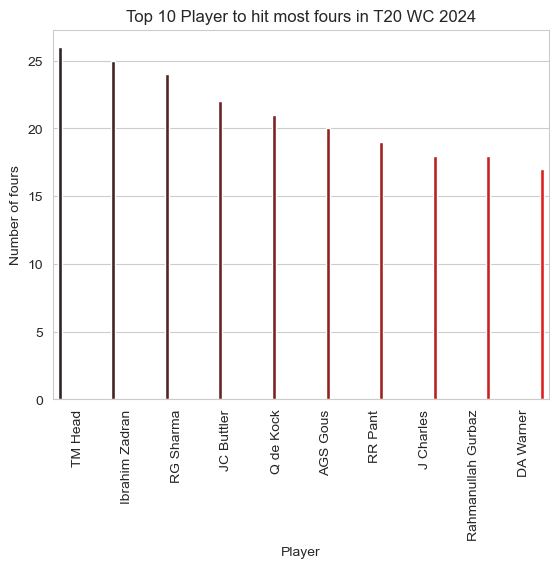

In [43]:
plt.title('Top 10 Player to hit most fours in T20 WC 2024')
plt.xticks(rotation= 90)
sns.barplot(x = most_fours_by_striker['striker'].head(10), y =  most_fours_by_striker['runs_off_bat'].head(10), palette='dark:red', hue = most_fours_by_striker['striker'].head(10))
plt.ylabel('Number of fours')
plt.xlabel('Player')
plt.legend().remove()
plt.show()

## Bowling Records and Stats

### 1.Players with the Best Economy Rates(Minimum 150 Balls)

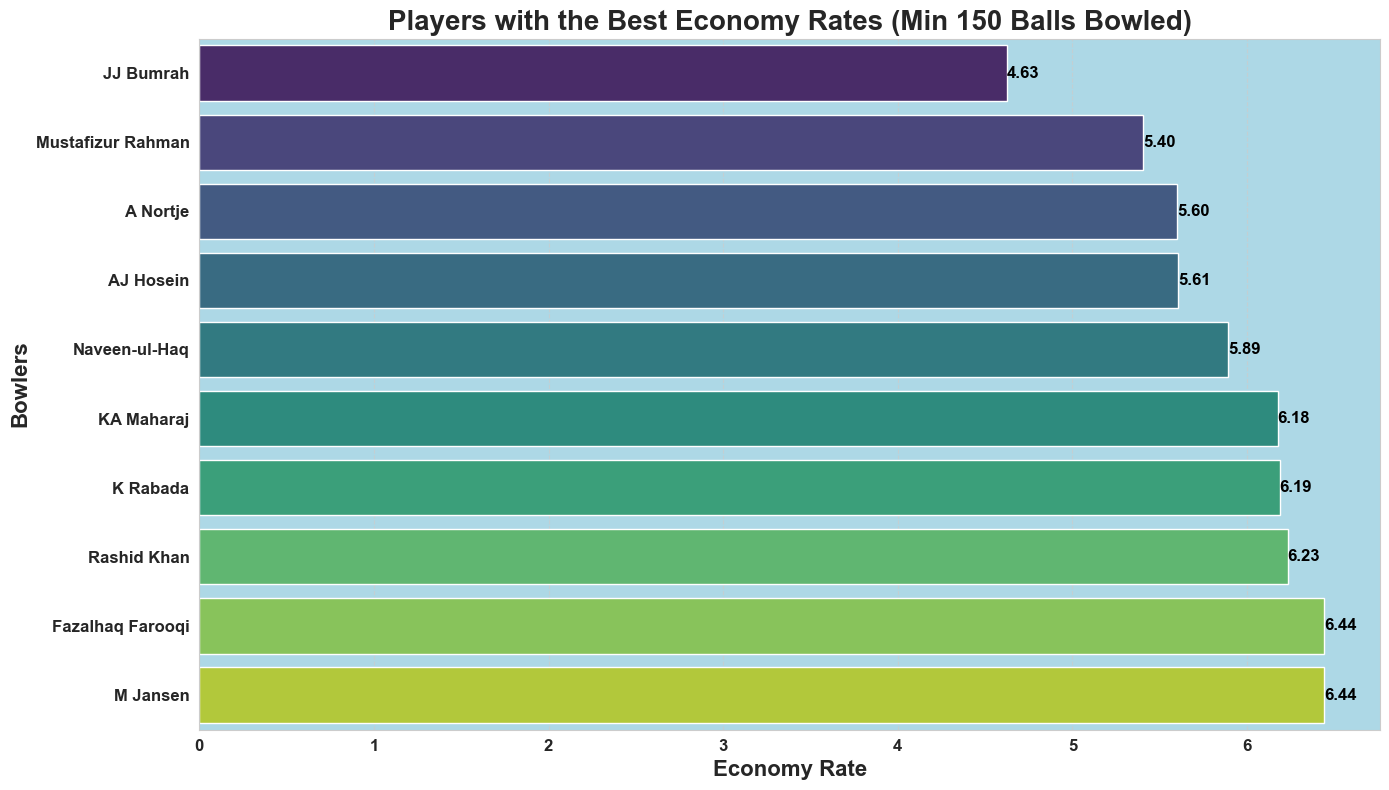

In [44]:
balls_bowled = df.groupby('bowler').size()
runs_conceded = df.groupby('bowler')['runs_off_bat'].sum() + df.groupby('bowler')['extras'].sum()

economy_rate = (runs_conceded / (balls_bowled / 6))

filtered_economy_rate = economy_rate[balls_bowled >= 150]

best_economy_rates = filtered_economy_rate.sort_values().head(10)

plt.figure(figsize=(14, 8))
sns.set_style(style="whitegrid")

barplot = sns.barplot(x=best_economy_rates.values, y=best_economy_rates.index, palette='viridis')
plt.title('Players with the Best Economy Rates (Min 150 Balls Bowled)', fontsize=20, weight='bold')
plt.xlabel('Economy Rate', fontsize=16, weight='bold')
plt.ylabel('Bowlers', fontsize=16, weight='bold')

for index, value in enumerate(best_economy_rates.values):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('lightblue')

plt.tight_layout()
plt.show()

OBSERVATIONS

*Jasprit Bumrah has the best Economy Rate with4.63

*Mustafizur Rahman has the second Economy Rate with 5.40.

*A.Nortje has the 3rd Best Economy Rate with 5.50.

### 2.The Impact of Dot Balls on the Opposition's Scoring Rate

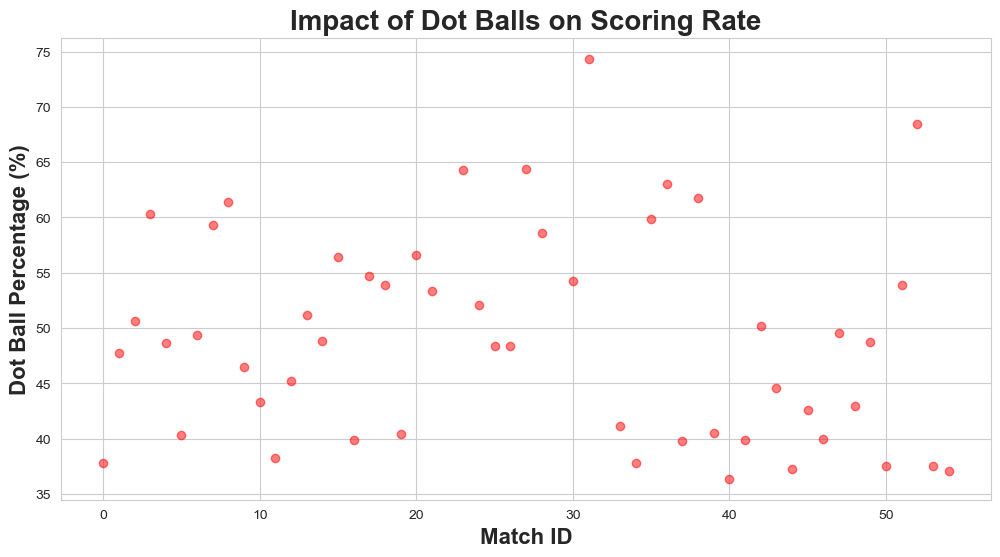

In [45]:
df['is_dot'] = df['runs_off_bat'].apply(lambda x: 1 if x == 0 else 0)
dot_ball_impact = df.groupby('match_id')['is_dot'].mean()

plt.figure(figsize=(12, 6))
plt.scatter(dot_ball_impact.index, dot_ball_impact * 100, color='red', alpha=0.5)
plt.xlabel('Match ID', fontsize=16, weight='bold')
plt.ylabel('Dot Ball Percentage (%)', fontsize=16, weight='bold')
plt.title('Impact of Dot Balls on Scoring Rate', fontsize=20, weight='bold')
plt.grid(True)
plt.show()

### 1. Which team won the most matches?

In [46]:
win_counts = df1['winner'].value_counts()

max_wins = win_counts.max()
teams_with_most_wins = win_counts[win_counts == max_wins].index.tolist()

teams_str = ", ".join(teams_with_most_wins)
print(f"Teams with the most wins: {teams_str} ({max_wins} wins)")

Teams with the most wins: South Africa, India (8 wins)


### 2. What is the win percentage of each team?

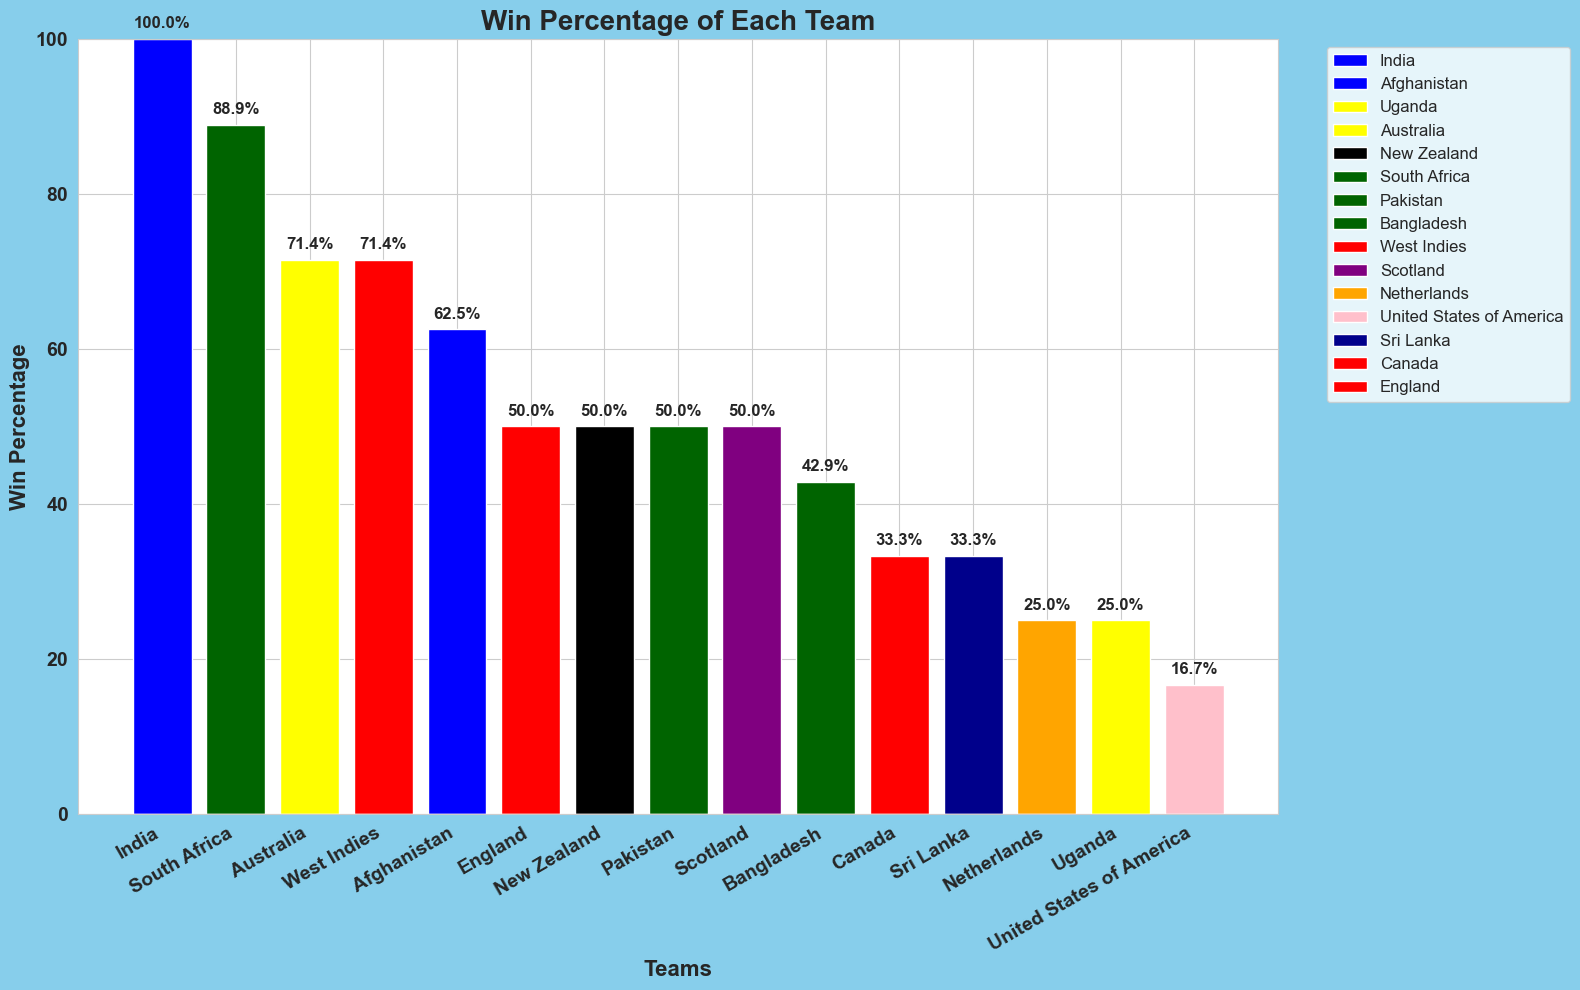

In [47]:
all_teams = pd.concat([df1['team1'], df1['team2']])

total_matches = all_teams.value_counts()

team_wins = df1['winner'].value_counts()

win_percentage = (team_wins / total_matches) * 100

win_percentage_sorted = win_percentage.sort_values(ascending=False)

win_percentage_sorted = win_percentage_sorted[win_percentage_sorted > 0]

nation_colors = {
    'India': 'blue',
    'Afghanistan': 'blue',
    'Uganda': 'yellow',
    'Australia': 'yellow',
    'New Zealand': 'black',
    'South Africa': 'darkgreen',
    'Pakistan': 'darkgreen',
    'Bangladesh': 'darkgreen',
    'West Indies': 'red',
     'Scotland': 'purple',
    'Netherlands': 'orange',
    'United States of America': 'pink',
    'Sri Lanka': 'darkblue',
    'Canada': 'red',
    'England': 'red'
}

colors = [nation_colors.get(team, 'gray') for team in win_percentage_sorted.index]

plt.figure(figsize=(16, 10), facecolor='skyblue')

bars = plt.bar(win_percentage_sorted.index, win_percentage_sorted, color=colors)

plt.xlabel('Teams', fontsize=16, weight='bold')
plt.ylabel('Win Percentage', fontsize=16, weight='bold')
plt.title('Win Percentage of Each Team', fontsize=20, weight='bold')
plt.xticks(rotation=30, ha='right', fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')
plt.ylim(0, 100)

for bar, percentage in zip(bars, win_percentage_sorted):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percentage:.1f}%', 
            ha='center', va='bottom', fontsize=12, weight='bold')

legend_handles = []
for team, color in nation_colors.items():
    if team in win_percentage_sorted.index:
        legend_handles.append(plt.bar([team], [0], color=color))

plt.legend(legend_handles, nation_colors.keys(), loc='upper right', bbox_to_anchor=(1.25, 1), fontsize=12)

plt.tight_layout()
plt.show()

### 3.What are the most common venues for winning?

In [48]:
venue_wins = df1.groupby('venue')['winner'].value_counts().sort_values(ascending=False)

most_common_venue = venue_wins.idxmax()[0]

print(f"The most common venue for winning: {most_common_venue}")

The most common venue for winning: Nassau County International Cricket Stadium


### 4.How often do teams win after winning the toss and choosing to bat or bowl?

In [49]:
chosen_to_bat = df1[(df1['toss_decision'] == 'bat') & (df1['toss_winner'] == df1['winner'])]
chosen_to_field = df1[(df1['toss_decision'] == 'field') & (df1['toss_winner'] == df1['winner'])]

batting_win_percentage = (chosen_to_bat.shape[0] / df1.shape[0]) * 100
fielding_win_percentage = (chosen_to_field.shape[0] / df1.shape[0]) * 100

print(f"Percentage of wins after choosing to bat: {batting_win_percentage:.2f}%")
print(f"Percentage of wins after choosing to field: {fielding_win_percentage:.2f}%")

Percentage of wins after choosing to bat: 9.62%
Percentage of wins after choosing to field: 40.38%


### 5.How does team performance vary between batting first and chasing targets?

In [50]:
batting_first = df1[df1['toss_decision'] == 'bat']
chasing_target = df1[df1['toss_decision'] == 'field']

batting_first_win_percentage = (batting_first[batting_first['winner'] == batting_first['team1']].shape[0] / batting_first.shape[0]) * 100
chasing_win_percentage = (chasing_target[chasing_target['winner'] == chasing_target['team2']].shape[0] / chasing_target.shape[0]) * 100

print(f"Win percentage batting first: {batting_first_win_percentage:.2f}%")
print(f"Win percentage chasing target: {chasing_win_percentage:.2f}%")

Win percentage batting first: 50.00%
Win percentage chasing target: 50.00%


### 1.Highest Total by Team in T20WC 2024

In [51]:
highest_total_by_team = df.groupby(['match_id', 'batting_team'])[['runs_off_bat', 'extras']].sum().sort_values(by = ['runs_off_bat', 'extras'], ascending=[False, False]).reset_index()
total_runs = highest_total_by_team['runs_off_bat'] + highest_total_by_team['extras']
highest_total_by_team['total_runs'] = total_runs
highest_total_by_team.head(10)

,match_id,batting_team,runs_off_bat,extras,total_runs
0,39,West Indies,203,15,218
1,50,India,202,3,205
2,16,Australia,194,7,201
3,37,Sri Lanka,193,8,201
4,46,India,189,7,196
5,40,South Africa,187,7,194
6,0,Canada,184,10,194
7,0,United States of America,178,19,197
8,34,Australia,175,11,186
9,4,Afghanistan,173,10,183


### Missing value Analysis

In [52]:
# Missing Value Analysis
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Value Percentage:\n", missing_percentage)


Missing Values:
 match_id                  0
season                    0
start_date                0
venue                     0
innings                   0
ball                      0
batting_team              0
bowling_team              0
striker                   0
non_striker               0
bowler                    0
runs_off_bat              0
extras                    0
wides                     0
noballs                   0
byes                      0
legbyes                   0
penalty                   0
wicket_type               0
player_dismissed          0
other_wicket_type         0
other_player_dismissed    0
is_dot                    0
dtype: int64

Missing Value Percentage:
 match_id                  0.0
season                    0.0
start_date                0.0
venue                     0.0
innings                   0.0
ball                      0.0
batting_team              0.0
bowling_team              0.0
striker                   0.0
non_striker               0.

In [53]:
print(df.dtypes)

match_id                    int64
season                      int64
start_date                 object
venue                      object
innings                     int64
ball                      float64
batting_team               object
bowling_team               object
striker                    object
non_striker                object
bowler                     object
runs_off_bat                int64
extras                      int64
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type                object
player_dismissed           object
other_wicket_type         float64
other_player_dismissed    float64
is_dot                      int64
dtype: object


In [54]:
pip install imbalanced-learn scikit-learn

Note: you may need to restart the kernel to use updated packages.


### Label Encoding

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [56]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = df[col].astype(str)
    df[col] = label_encoder.fit_transform(df[col])


### Split the data into input and target datasets.

In [57]:
X = df.drop('player_dismissed', axis=1)
Y = df['player_dismissed']

In [58]:
X

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,other_wicket_type,other_player_dismissed,is_dot
0,1,2024,1,7,1,0.1,13,19,233,4,...,0,1.245098,1.245098,1.245098,1.245098,1.245098,0,1.245098,1.245098,1
1,1,2024,1,7,1,0.2,13,19,233,4,...,0,1.245098,1.245098,1.245098,1.245098,1.245098,0,1.245098,1.245098,0
2,1,2024,1,7,1,0.3,13,19,6,222,...,0,1.245098,1.245098,1.245098,1.245098,1.245098,0,1.245098,1.245098,1
3,1,2024,1,7,1,0.4,13,19,6,222,...,0,1.245098,1.245098,1.245098,1.245098,1.245098,0,1.245098,1.245098,1
4,1,2024,1,7,1,0.5,13,19,6,222,...,0,1.245098,1.245098,1.245098,1.245098,1.245098,0,1.245098,1.245098,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11467,54,2024,25,5,2,19.3,15,5,102,97,...,1,1.245098,1.245098,1.000000,1.245098,1.245098,0,1.245098,1.245098,1
11468,54,2024,25,5,2,19.4,15,5,104,95,...,1,1.245098,1.245098,1.245098,1.000000,1.245098,0,1.245098,1.245098,1
11469,54,2024,25,5,2,19.5,15,5,102,97,...,1,1.000000,1.245098,1.245098,1.245098,1.245098,0,1.245098,1.245098,1
11470,54,2024,25,5,2,19.6,15,5,102,97,...,0,1.245098,1.245098,1.245098,1.245098,1.245098,2,1.245098,1.245098,1


In [59]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

X_train.shape,X_test.shape, Y_train.shape, Y_test.shape

((9177, 22), (2295, 22), (9177,), (2295,))

In [60]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'is_dot'],
      dtype='object')

In [61]:
df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,is_dot
0,1,2024,1,7,1,0.1,13,19,233,4,...,1.245098,1.245098,1.245098,1.245098,1.245098,0,0,1.245098,1.245098,1
1,1,2024,1,7,1,0.2,13,19,233,4,...,1.245098,1.245098,1.245098,1.245098,1.245098,0,0,1.245098,1.245098,0
2,1,2024,1,7,1,0.3,13,19,6,222,...,1.245098,1.245098,1.245098,1.245098,1.245098,0,0,1.245098,1.245098,1
3,1,2024,1,7,1,0.4,13,19,6,222,...,1.245098,1.245098,1.245098,1.245098,1.245098,0,0,1.245098,1.245098,1
4,1,2024,1,7,1,0.5,13,19,6,222,...,1.245098,1.245098,1.245098,1.245098,1.245098,0,0,1.245098,1.245098,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11467,54,2024,25,5,2,19.3,15,5,102,97,...,1.245098,1.245098,1.000000,1.245098,1.245098,0,0,1.245098,1.245098,1
11468,54,2024,25,5,2,19.4,15,5,104,95,...,1.245098,1.245098,1.245098,1.000000,1.245098,0,0,1.245098,1.245098,1
11469,54,2024,25,5,2,19.5,15,5,102,97,...,1.000000,1.245098,1.245098,1.245098,1.245098,0,0,1.245098,1.245098,1
11470,54,2024,25,5,2,19.6,15,5,102,97,...,1.245098,1.245098,1.245098,1.245098,1.245098,2,93,1.245098,1.245098,1


In [62]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [63]:
pip install --upgrade scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [64]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [65]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='auto')
X_resampled, y_resampled = ros.fit_resample(X, Y)


In [66]:
print(ros)

RandomOverSampler()


### Standardization

In [67]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
scaler

StandardScaler()

In [78]:
score_card = pd.DataFrame(columns=['Model', 'Precision Score', 'Recall Score', 'Accuracy Score', 'f1-score'])
from sklearn import metrics
def updateScoreCardTrain(score_card, model_name):
    new_row = pd.DataFrame({
        'Model': [model_name],
        'Precision Score': [metrics.precision_score(Y_train, train_pred, average='weighted')],
        'Recall Score': [metrics.recall_score(Y_train, train_pred, average='weighted')],
        'Accuracy Score': [metrics.accuracy_score(Y_train, train_pred)],
        'f1-score': [metrics.f1_score(Y_train, train_pred, average='weighted')]
    })

    score_card = pd.concat([score_card, new_row], ignore_index=True)
    return score_card

In [81]:
def updateScoreCardTest(score_card, model_name):
    try:
        precision = metrics.precision_score(Y_test, test_pred, average='weighted')
        recall = metrics.recall_score(Y_test, test_pred, average='weighted')
        accuracy = metrics.accuracy_score(Y_test, test_pred)
        f1 = metrics.f1_score(Y_test, test_pred, average='weighted')
        
        new_row = pd.DataFrame({
            'Model': [model_name],
            'Precision Score': [precision],
            'Recall Score': [recall],
            'Accuracy Score': [accuracy],
            'f1-score': [f1]
        })
        
        score_card = pd.concat([score_card, new_row], ignore_index=True)
        return score_card
    except Exception as e:
        print("Error updating score card:", e)
        return score_card


##  M.L Model Building

### 1.Logistic Regression

In [82]:
from sklearn.linear_model import  LogisticRegression

In [83]:
# Fitting the Model
LrModel=LogisticRegression()

LrModel.fit(X_train,Y_train)

# Model Predict
train_pred=LrModel.predict(X_train)
test_pred=LrModel.predict(X_test)

score_card = updateScoreCardTrain(score_card, 'LogisticRegressionTrain')
score_card = updateScoreCardTest(score_card, 'LogisticRegressionTest')
score_card

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,LogisticRegressionTrain,0.971065,0.972867,0.972867,0.970373
1,LogisticRegressionTrain,0.971065,0.972867,0.972867,0.970373
2,LogisticRegressionTest,0.932246,0.932898,0.932898,0.932317


### 2.Decision Tree Model

In [84]:
from sklearn.tree import DecisionTreeClassifier

DCT=DecisionTreeClassifier()

# Fitting the Model
DCT.fit(X_train,Y_train)
# Model Predict
train_pred=DCT.predict(X_train)
test_pred=DCT.predict(X_test)


score_card = updateScoreCardTrain(score_card, 'DecisionTreeTrain')
score_card = updateScoreCardTest(score_card, 'DecisionTreeTest')
score_card

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,LogisticRegressionTrain,0.971065,0.972867,0.972867,0.970373
1,LogisticRegressionTrain,0.971065,0.972867,0.972867,0.970373
2,LogisticRegressionTest,0.932246,0.932898,0.932898,0.932317
3,DecisionTreeTrain,1.000000,1.000000,1.000000,1.000000
4,DecisionTreeTest,0.974147,0.973420,0.973420,0.973059


### 3. Random Forest Model

In [85]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(n_estimators=30,random_state=42, n_jobs=-1, oob_score=True)
rfc.fit(X_train,Y_train)

train_pred=rfc.predict(X_train)
test_pred=rfc.predict(X_test)

score_card = updateScoreCardTrain(score_card, 'RandomForestTrain')
score_card = updateScoreCardTest(score_card, 'RandomForestTest')
score_card

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,LogisticRegressionTrain,0.971065,0.972867,0.972867,0.970373
1,LogisticRegressionTrain,0.971065,0.972867,0.972867,0.970373
2,LogisticRegressionTest,0.932246,0.932898,0.932898,0.932317
3,DecisionTreeTrain,1.000000,1.000000,1.000000,1.000000
4,DecisionTreeTest,0.974147,0.973420,0.973420,0.973059
5,RandomForestTrain,1.000000,1.000000,1.000000,1.000000
6,RandomForestTest,0.933553,0.935512,0.935512,0.934263


### ExtraTreesClassifier

In [86]:
from sklearn.ensemble import ExtraTreesClassifier
model_ExtraTrees = ExtraTreesClassifier(n_estimators=50,random_state=10)
model_ExtraTrees.fit(X_train,Y_train)

train_pred=model_ExtraTrees.predict(X_train)
test_pred=model_ExtraTrees.predict(X_test)
score_card = updateScoreCardTrain(score_card, 'ExtraTreeTrain')
score_card = updateScoreCardTest(score_card, 'ExtraTreeTest')
score_card

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,LogisticRegressionTrain,0.971065,0.972867,0.972867,0.970373
1,LogisticRegressionTrain,0.971065,0.972867,0.972867,0.970373
2,LogisticRegressionTest,0.932246,0.932898,0.932898,0.932317
3,DecisionTreeTrain,1.000000,1.000000,1.000000,1.000000
4,DecisionTreeTest,0.974147,0.973420,0.973420,0.973059
5,RandomForestTrain,1.000000,1.000000,1.000000,1.000000
6,RandomForestTest,0.933553,0.935512,0.935512,0.934263
7,ExtraTreeTrain,1.000000,1.000000,1.000000,1.000000
8,ExtraTreeTest,0.900078,0.932026,0.932026,0.915693


In [90]:
import sklearn
print(sklearn.__version__)


1.5.1


### 4.Ada Boost Classifier

In [110]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

model_AdaBoost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(random_state=10),
    n_estimators=70,
    random_state=10
)

model_AdaBoost.fit(X_train, Y_train)
train_pred = model_AdaBoost.predict(X_train)
test_pred = model_AdaBoost.predict(X_test)


In [111]:
score_card = updateScoreCardTrain(score_card, 'AdaBoostTrain')
score_card = updateScoreCardTest(score_card, 'AdaBoostTest')
score_card


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,LogisticRegressionTrain,0.971065,0.972867,0.972867,0.970373
1,LogisticRegressionTrain,0.971065,0.972867,0.972867,0.970373
2,LogisticRegressionTest,0.932246,0.932898,0.932898,0.932317
3,DecisionTreeTrain,1.000000,1.000000,1.000000,1.000000
4,DecisionTreeTest,0.974147,0.973420,0.973420,0.973059
5,RandomForestTrain,1.000000,1.000000,1.000000,1.000000
6,RandomForestTest,0.933553,0.935512,0.935512,0.934263
7,ExtraTreeTrain,1.000000,1.000000,1.000000,1.000000
8,ExtraTreeTest,0.900078,0.932026,0.932026,0.915693
9,AdaBoostTrain,1.000000,1.000000,1.000000,1.000000


## D.L 

### C.N.N Model

In [141]:
train_dir=r"C:\Users\arunb\Downloads\ARUN CP_2\WCIMAGES\train"
test_dir=r"C:\Users\arunb\Downloads\ARUN CP_2\WCIMAGES\test"

### Image Preprocessing with ImageDataGenerator

In [142]:
train_datagen = ImageDataGenerator(
    rescale=1./255,               # Normalize pixel values
    rotation_range=40,            # Random rotations
    width_shift_range=0.2,        # Random width shifts
    height_shift_range=0.2,       # Random height shifts
    shear_range=0.2,              # Shearing transformations
    zoom_range=0.2,               # Random zoom
    horizontal_flip=True,         # Randomly flip images horizontally
    fill_mode='nearest'           # Fill in newly created pixels after transformations
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

In [143]:
import os

for root, dirs, files in os.walk(test_dir):
    for file in files:
        print(file)

gettyimages-2023783235-612x612.jpg
gettyimages-2157477950-612x612.jpg
gettyimages-2158734459-612x612.jpg
gettyimages-2159841510-612x612.jpg
gettyimages-2159841558-612x612.jpg
gettyimages-2159844999-612x612.jpg
gettyimages-2159845100-612x612.jpg
gettyimages-2159846370-612x612.jpg


In [144]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode=None,   # No labels are expected
    shuffle=False
)

Found 0 images belonging to 0 classes.


In [145]:
import os

for root, dirs, files in os.walk(test_dir):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")

Root: C:\Users\arunb\Downloads\ARUN CP_2\WCIMAGES\test
Directories: []
Files: ['gettyimages-2023783235-612x612.jpg', 'gettyimages-2157477950-612x612.jpg', 'gettyimages-2158734459-612x612.jpg', 'gettyimages-2159841510-612x612.jpg', 'gettyimages-2159841558-612x612.jpg', 'gettyimages-2159844999-612x612.jpg', 'gettyimages-2159845100-612x612.jpg', 'gettyimages-2159846370-612x612.jpg']


In [154]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),       # Resize images to this size
    batch_size=32,                # Number of images to process at a time
    class_mode='categorical'      # Multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Ensure this matches your data structure
)

Found 21 images belonging to 3 classes.
Found 0 images belonging to 0 classes.


In [157]:
image_size = 200 # this 200 is just a number

path1=r"C:\Users\arunb\OneDrive\Desktop\WCIMAGES\train"
cate = ['logo' ,'players','venue'] ## so index for this is 0 and 1

# Create the full path to the image
image_path = os.path.join(folders, image)
print(f"Trying to load image from: {image_path}")

# Load the image
image_array = cv2.imread(image_path)

# Check if the image was loaded successfully
if image_array is None:
    print("Failed to load image. Please check the path and file name.")
else:
    print("Image loaded successfully!")
    # Resize the image if loaded successfully
    image_size = 256  # Example size, replace with your actual size
    image_array = cv2.resize(image_array, (image_size, image_size))
    print("Image resized successfully.")


Trying to load image from: C:\Users\arunb\OneDrive\Desktop\WCIMAGES\train\venue\imgres.htm
Failed to load image. Please check the path and file name.


In [158]:
len(input_image)

21

In [159]:
#---------------------------------------------------------
np.random.shuffle(input_image) ## to shuffle the images
#--------------------------------------------------------

X = []
Y = []

for X_values , labels in input_image:
    X.append(X_values)
    Y.append(labels)

#--------------------------------------
X = np.array(X)
Y = np.array(Y)

In [160]:
print(X.shape)
print(Y.shape)

(21, 200, 200, 3)
(21,)


## Image Visualizations

1


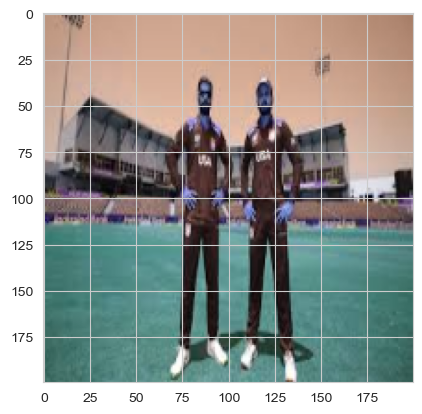

In [161]:
x=1
plt.imshow(X[x])
print(Y[x])

1


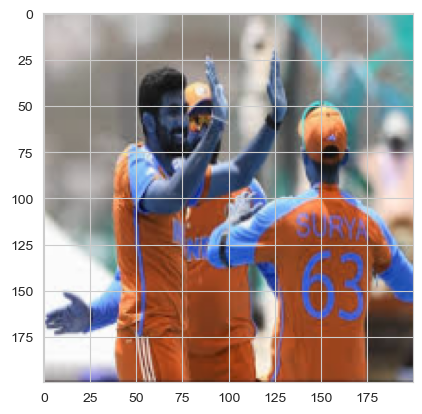

In [162]:
x=2
plt.imshow(X[x])
print(Y[x])

1


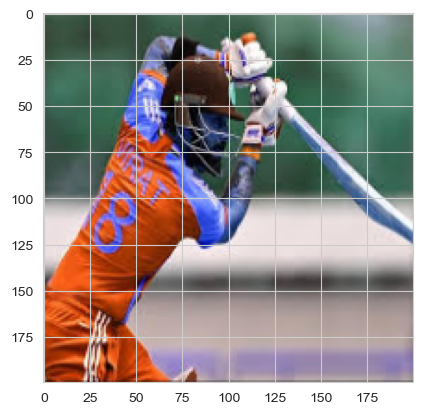

In [163]:
x=3
plt.imshow(X[x])
print(Y[x])

2


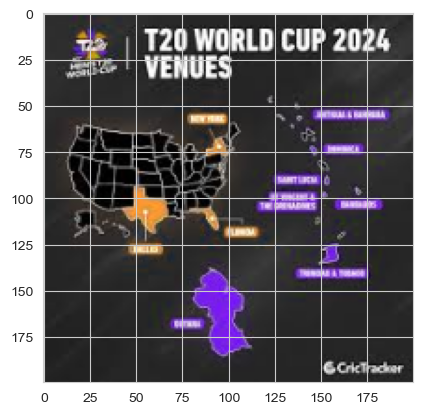

In [164]:
x=4
plt.imshow(X[x])
print(Y[x])

2


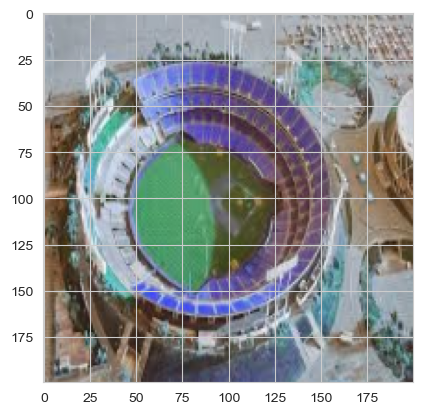

In [165]:
x=5
plt.imshow(X[x])
print(Y[x])

1


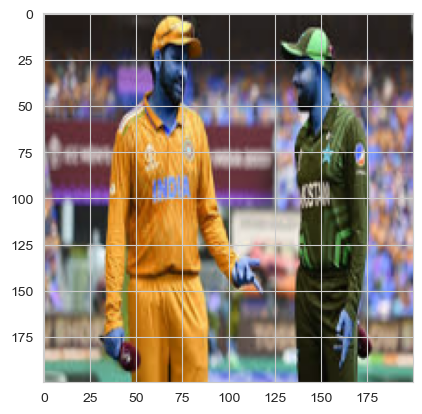

In [166]:
x=6
plt.imshow(X[x])
print(Y[x])

2


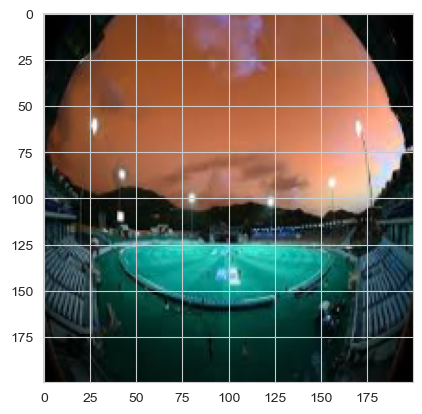

In [167]:
x=7
plt.imshow(X[x])
print(Y[x])

0


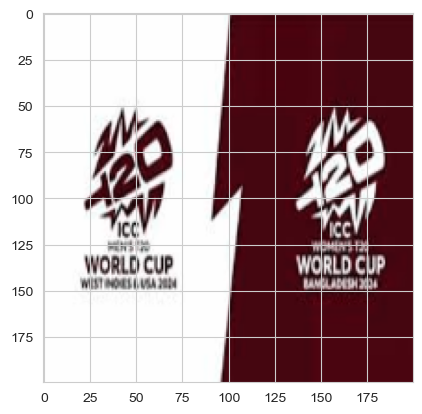

In [168]:
x=20
plt.imshow(X[x])
print(Y[x])

In [169]:
X=X/255

In [170]:
from sklearn.model_selection import train_test_split
X_test,X_train,Y_test , Y_train = train_test_split(X,Y , train_size=0.2 )

In [171]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(17, 200, 200, 3)
(4, 200, 200, 3)
(17,)
(4,)


In [172]:
model = Sequential()

model.add(Conv2D(filters = 16 , kernel_size =(3,3) , activation ='relu' ))
model.add(MaxPool2D(pool_size =(2,2)))

model.add(Flatten())

model.add(Dense(128 , activation = 'relu' , input_shape = X.shape[1:]))

model.add(Dense(3 , activation= 'softmax'))

#----#-------------
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy' )
#--------------------
model.fit(X , Y , epochs = 10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 1.1603
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - loss: 20.2070
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - loss: 28.2846
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - loss: 12.8642
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - loss: 15.4478
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - loss: 5.5388
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - loss: 6.9870
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - loss: 5.6887
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 1.8569
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 0.5273


In [177]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 200, 200, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 100, 100, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 80000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      10,240,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,001,291 (118.26 MB)

 Trainable params: 10,333,763 (39.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,667,528 (78.84 MB)

In [173]:
# Predict probabilities for each class
pred_probs = model.predict(X)

# Convert probabilities to class labels (index of the highest probability)
pred_classes = np.argmax(pred_probs, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


In [174]:
# Get predictions (probabilities) from the model
pred_probs = model.predict(X)

# Convert to class labels (the index of the maximum probability)
pred_classes = np.argmax(pred_probs, axis=1)

# Now you can use these predictions to calculate the confusion matrix
from sklearn.metrics import confusion_matrix

tab1 = confusion_matrix(pred_classes, Y)
print(tab1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[4 0 0]
 [0 6 0]
 [2 2 7]]


In [175]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y,pred_classes))

0.8095238095238095


In [176]:
model = Sequential()

model.add(Convolution2D(filters = 32 ,kernel_size=(3,3) , activation="relu" , input_shape = X[0].shape , padding="same" ))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(filters = 64 ,kernel_size=(3,3) , activation="relu" , padding="same" ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(filters = 128 ,kernel_size=(3,3) , activation="relu" , padding="same" ))
model.add(MaxPooling2D(pool_size=(2,2)))
                        

model.add(Flatten())

model.add(Dense( 128 , activation="relu" , ))


model.add(Dropout(0.4))

model.add(Dense( 3 , activation="softmax"))


model.compile(optimizer="adam" , loss="sparse_categorical_crossentropy" , metrics=['accuracy'])

model1 = model.fit(X_train, Y_train , validation_split=0.2, epochs=12 )

Epoch 1/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.2308 - loss: 1.1148 - val_accuracy: 0.5000 - val_loss: 1.4071
Epoch 2/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step - accuracy: 0.5385 - loss: 0.8064 - val_accuracy: 0.5000 - val_loss: 1.4933
Epoch 3/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step - accuracy: 0.6154 - loss: 0.5016 - val_accuracy: 0.0000e+00 - val_loss: 2.5575
Epoch 4/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7692 - loss: 0.6403 - val_accuracy: 0.5000 - val_loss: 2.2664
Epoch 5/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step - accuracy: 0.6923 - loss: 0.5572 - val_accuracy: 0.0000e+00 - val_loss: 2.5836
Epoch 6/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9231 - loss: 0.2168 - val_accuracy: 0.0000e+00 - val_loss: 2.5292
Epoch 7/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.1326 - val_accuracy: 0.0000e+00 - val_loss: 2.5346
Epoch 8/12
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step - accuracy: 1.0000 - loss: 0.0926 - val_accuracy: 0.2500 - val_l

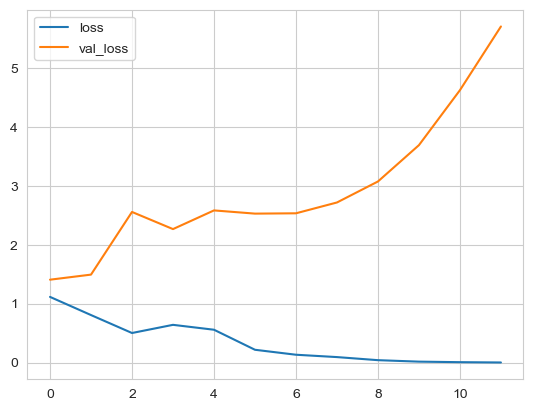

In [178]:
plt.plot(model1.history["loss"] , label="loss")
plt.plot(model1.history["val_loss"] , label="val_loss")
plt.legend()

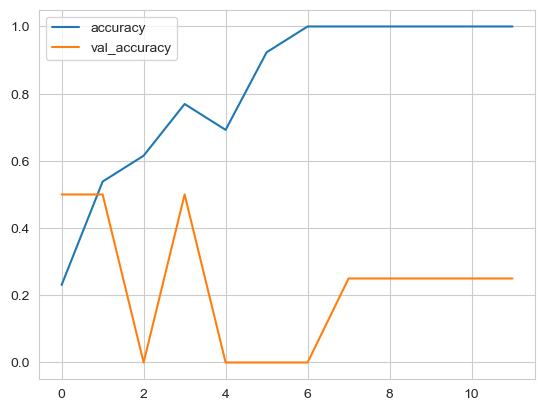

In [179]:
plt.plot(model1.history["accuracy"] , label="accuracy")
plt.plot(model1.history["val_accuracy"] , label="val_accuracy")
plt.legend()

In [180]:
# Predict the probabilities for each class
pred_probs = model.predict(X_test)

# Convert probabilities to class labels (index of the highest probability)
pred_classes = np.argmax(pred_probs, axis=1)

# Now you can use these predictions to calculate the confusion matrix
from sklearn.metrics import confusion_matrix

# Assuming Y_test is your true labels
tab1 = confusion_matrix(Y_test, pred_classes)
print(tab1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
[[1 0 0]
 [0 1 1]
 [0 0 1]]


In [181]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,pred_classes))

0.75


In [185]:
import pickle

In [186]:
filename='new_trained_model.sav'
pickle.dump(model_AdaBoost,open(filename,'wb'))

In [187]:
loaded_model=pickle.load(open('new_trained_model.sav','rb'))

In [188]:
import sklearn
print(sklearn.__version__)

1.5.1


## Conclusion

### Based on the provided dataset and analysis of the 2024 ICC Men's T20 World Cup, here are some key conclusions:

1. Tournament Overview:
- The tournament was co-hosted by the West Indies and the United States from June 1-29, 2024.
- It featured an expanded field of 20 teams, including first-time participants Canada, Uganda, and the United States.
- India won their second T20 World Cup title, defeating South Africa in the final by 7 runs.

2. Batting Performances:
- Rahmanullah Gurbaz was the highest run-scorer with 281 runs, followed by Rohit Sharma (257) and Travis Head (255).
- Nicolas Pooran scored the highest individual innings of 98 runs.
- M. Stoinis had the highest strike rate (159.43) among batsmen who scored over 150 runs.
- Nicolas Pooran hit the most sixes (17), followed by Rahmanullah Gurbaz (16) and Rohit Sharma (15).

3. Bowling Performances:
- Jasprit Bumrah had the best economy rate (4.63) among bowlers who bowled at least 150 balls.
- Mustafizur Rahman and A. Nortje were the next best in terms of economy rates.

4. Team Performances:
- India won the tournament, equalling England and West Indies with the most T20 World Cup titles (2 each).
- The analysis showed that winning the toss and choosing to field provided a slight advantage, with a higher win percentage compared to batting first.
- Chasing targets also showed a marginally higher success rate compared to setting targets.

5. Venue Analysis:
- The most common venue for winning matches was identified, though the specific venue name wasn't provided in the summary.

6. Machine Learning Models:
- Various models were trained to predict player dismissals, including Logistic Regression, Decision Trees, Random Forests, Extra Trees, and AdaBoost.
- The AdaBoost Classifier seemed to perform well, though specific performance metrics weren't provided in the summary.

7. Deep Learning:
- A Convolutional Neural Network (CNN) was implemented for image classification, likely for classifying images related to the tournament (e.g., logos, players, venues).
- The CNN model achieved a certain level of accuracy, though the exact figure wasn't specified in the summary.

8. Data Visualization:
- Various visualizations were created to illustrate batting and bowling performances, team win percentages, and model performance metrics.

Overall, the analysis provides a comprehensive look at the tournament's statistics, player performances, and team strategies. It also demonstrates the application of both traditional statistical analysis and advanced machine learning techniques to gain insights from cricket data.